In [1]:
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy.sql import text
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,timedelta 
DB_NAME ="postgres"
DB_USER= "root"
DB_PASS="7KxkIO3N4g6vef7W8mMf"
DB_HOST="database-1.ctkumo88chgh.us-east-2.rds.amazonaws.com"
DB_PORT="5432"

In [2]:
engine = create_engine(f"postgresql://{DB_USER}:{DB_PASS}@{DB_HOST}/{DB_NAME}")
conn =engine.connect()

In [3]:
sql_query= text("SELECT * FROM testdata")
df=pd.read_sql(sql_query,conn)


In [4]:
display(df)

,message_time,route_id,unique_id,service_start_date,update_origin,train_platform,working_time_pass,working_time_arrival,working_time_departure,planned_time_arrival,...,train_length,estimated_time,source,actual_time,actual_time_class,is_delayed_arrival,is_delayed_departure,late_code,source_instance,estimated_time_minutes
0,17:27:16.584408,202403297025211,F25211,2024-03-29,TD,ROMFORD,None,17:29:30,17:30:00,17:30:00,...,10.0,None,None,None,None,False,False,None,None,None
1,17:27:16.584408,202403297025211,F25211,2024-03-29,TD,SHENFLD,None,17:38:30,17:39:00,17:39:00,...,10.0,None,None,None,None,False,False,None,None,None
2,17:27:16.584408,202403297025211,F25211,2024-03-29,TD,BILERCY,None,17:44:30,17:49:30,17:45:00,...,10.0,None,None,None,None,False,False,None,None,None
3,17:27:16.599408,202403297420713,J20713,2024-03-29,CIS,CHLSFLD,None,17:27:30,17:28:00,17:28:00,...,8.0,None,None,None,None,False,False,None,None,None
4,17:27:23.812408,202403298731420,W31420,2024-03-29,None,TABY,None,17:30:30,17:31:30,17:31:00,...,NaN,None,None,None,None,False,False,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121818,17:18:00.649408,202403317126913,G26913,2024-03-31,Darwin,HARLSDN,None,16:49:00,16:49:30,16:49:00,...,NaN,None,None,None,None,True,True,None,None,None
121819,17:18:00.650408,202403317126544,G26544,2024-03-31,Darwin,HARLSDN,None,17:12:00,17:12:30,17:12:00,...,NaN,None,None,None,None,True,True,None,None,None
121820,17:18:00.650408,202403317126544,G26544,2024-03-31,Darwin,WLSDNJL,None,17:14:00,17:14:30,17:14:00,...,NaN,None,None,None,None,True,True,None,None,None
121821,17:18:00.650408,202403317126544,G26544,2024-03-31,Darwin,KENSLG,None,17:16:30,17:17:00,17:17:00,...,NaN,None,None,None,None,True,True,None,None,None


In [5]:
df.columns

Index(['message_time', 'route_id', 'unique_id', 'service_start_date',
       'update_origin', 'train_platform', 'working_time_pass',
       'working_time_arrival', 'working_time_departure',
       'planned_time_arrival', 'planned_time_departure', 'actual_arrival_time',
       'actual_departure_time', 'platform', 'train_length', 'estimated_time',
       'source', 'actual_time', 'actual_time_class', 'is_delayed_arrival',
       'is_delayed_departure', 'late_code', 'source_instance',
       'estimated_time_minutes'],
      dtype='object')

In [6]:
column_names=['message_time', 'route_id', 'unique_id', 'service_start_date',
       'update_origin', 'train_platform', 'working_time_pass',
       'working_time_arrival', 'working_time_departure',
       'planned_time_arrival', 'planned_time_departure', 'actual_arrival_time',
       'actual_departure_time', 'platform', 'train_length', 'estimated_time',
       'source', 'actual_time', 'actual_time_class', 'is_delayed_arrival',
       'is_delayed_departure', 'late_code', 'source_instance',
       'estimated_time_minutes']

In [7]:
valcountdict={}
for column in column_names:
    display(df[column].value_counts())

message_time
13:58:22.943408    33
19:19:56.605408    33
02:51:00.178408    33
15:12:01.407408    32
09:10:29.651408    32
                   ..
17:22:31.758408     1
17:22:32.245408     1
23:24:15.662408     1
23:24:15.682408     1
17:22:39.225408     1
Name: count, Length: 51420, dtype: int64

route_id
202403317076198    160
202403308308198    130
202403318049422    125
202403308052246    112
202403298118089    108
                  ... 
202403317873810      1
202403317873807      1
202403317873806      1
202403317873809      1
202403317089883      1
Name: count, Length: 24465, dtype: int64

unique_id
F76198    160
S08198    130
P49422    125
P52246    112
Q18089    108
         ... 
W00511      1
C13393      1
F34252      1
W33601      1
F89883      1
Name: count, Length: 24237, dtype: int64

service_start_date
2024-03-30    64498
2024-03-31    38065
2024-03-29    19241
2024-04-01       19
Name: count, dtype: int64

update_origin
TD             45344
Darwin         29494
CIS            29375
Trust          13115
Tyrell           384
Workstation       64
Name: count, dtype: int64

train_platform
LNDNBDE    779
ECROYDN    676
WLSDNJL    563
GTWK       549
CLPHMJM    529
          ... 
CWDN941      1
COPR105      1
STCN         1
LLDODGF      1
NLRT478      1
Name: count, Length: 2810, dtype: int64

Series([], Name: count, dtype: int64)

working_time_arrival
00:01:00    151
18:22:00    129
17:59:00    118
14:52:00    115
17:26:00    108
           ... 
01:46:30      1
04:25:00      1
02:46:30      1
02:20:00      1
01:47:00      1
Name: count, Length: 2748, dtype: int64

working_time_departure
11:45:00    119
08:35:00    118
11:26:00    114
17:47:00    113
18:22:30    112
           ... 
04:40:00      1
04:47:30      1
04:46:00      1
01:37:30      1
01:07:30      1
Name: count, Length: 2741, dtype: int64

planned_time_arrival
14:52:00    219
18:22:00    205
18:01:00    197
18:25:00    188
10:11:00    185
           ... 
04:09:00      1
04:01:00      1
04:25:00      1
04:43:00      1
03:34:00      1
Name: count, Length: 1361, dtype: int64

planned_time_departure
09:52:00    199
17:22:00    198
17:47:00    197
11:45:00    197
11:26:00    191
           ... 
03:45:00      1
03:42:00      1
04:01:00      1
04:14:00      1
02:57:00      1
Name: count, Length: 1352, dtype: int64

actual_arrival_time
18:01:00    179
18:20:00    176
09:35:00    171
18:25:00    170
15:52:00    166
           ... 
02:34:00      1
02:47:00      1
02:31:00      1
02:38:00      1
03:35:00      1
Name: count, Length: 1430, dtype: int64

actual_departure_time
15:50:00    213
14:35:00    201
10:12:00    201
18:01:00    198
11:08:00    196
           ... 
02:48:00      1
03:06:00      1
03:40:00      1
02:15:00      1
02:59:00      1
Name: count, Length: 1429, dtype: int64

platform
2      44684
1      42657
3       8799
4       6430
5       1751
       ...  
8C         1
18         1
DML        1
GL1        1
MS         1
Name: count, Length: 120, dtype: int64

train_length
8.0     14437
4.0      5242
12.0     5197
5.0      3835
10.0     3019
3.0      2957
6.0      2951
2.0      1353
7.0       214
9.0        91
11.0       39
Name: count, dtype: int64

Series([], Name: count, dtype: int64)

Series([], Name: count, dtype: int64)

Series([], Name: count, dtype: int64)

Series([], Name: count, dtype: int64)

is_delayed_arrival
False    110986
True      10837
Name: count, dtype: int64

is_delayed_departure
False    110373
True      11450
Name: count, dtype: int64

Series([], Name: count, dtype: int64)

Series([], Name: count, dtype: int64)

Series([], Name: count, dtype: int64)

In [8]:
df.isna().count()

message_time              121823
route_id                  121823
unique_id                 121823
service_start_date        121823
update_origin             121823
train_platform            121823
working_time_pass         121823
working_time_arrival      121823
working_time_departure    121823
planned_time_arrival      121823
planned_time_departure    121823
actual_arrival_time       121823
actual_departure_time     121823
platform                  121823
train_length              121823
estimated_time            121823
source                    121823
actual_time               121823
actual_time_class         121823
is_delayed_arrival        121823
is_delayed_departure      121823
late_code                 121823
source_instance           121823
estimated_time_minutes    121823
dtype: int64

In [9]:
df.duplicated().count()

121823

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121823 entries, 0 to 121822
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   message_time            121823 non-null  object 
 1   route_id                121823 non-null  object 
 2   unique_id               121823 non-null  object 
 3   service_start_date      121823 non-null  object 
 4   update_origin           117776 non-null  object 
 5   train_platform          121823 non-null  object 
 6   working_time_pass       0 non-null       object 
 7   working_time_arrival    121823 non-null  object 
 8   working_time_departure  121823 non-null  object 
 9   planned_time_arrival    111060 non-null  object 
 10  planned_time_departure  110507 non-null  object 
 11  actual_arrival_time     100342 non-null  object 
 12  actual_departure_time   112009 non-null  object 
 13  platform                114701 non-null  object 
 14  train_length        

In [11]:
df.head()

,message_time,route_id,unique_id,service_start_date,update_origin,train_platform,working_time_pass,working_time_arrival,working_time_departure,planned_time_arrival,...,train_length,estimated_time,source,actual_time,actual_time_class,is_delayed_arrival,is_delayed_departure,late_code,source_instance,estimated_time_minutes
0,17:27:16.584408,202403297025211,F25211,2024-03-29,TD,ROMFORD,None,17:29:30,17:30:00,17:30:00,...,10.0,None,None,None,None,False,False,None,None,None
1,17:27:16.584408,202403297025211,F25211,2024-03-29,TD,SHENFLD,None,17:38:30,17:39:00,17:39:00,...,10.0,None,None,None,None,False,False,None,None,None
2,17:27:16.584408,202403297025211,F25211,2024-03-29,TD,BILERCY,None,17:44:30,17:49:30,17:45:00,...,10.0,None,None,None,None,False,False,None,None,None
3,17:27:16.599408,202403297420713,J20713,2024-03-29,CIS,CHLSFLD,None,17:27:30,17:28:00,17:28:00,...,8.0,None,None,None,None,False,False,None,None,None
4,17:27:23.812408,202403298731420,W31420,2024-03-29,None,TABY,None,17:30:30,17:31:30,17:31:00,...,NaN,None,None,None,None,False,False,None,None,None


In [12]:
df['service_start_date']=pd.to_datetime(df['service_start_date'])
df['route_id'] = df['route_id'].astype(str)
df['working_time_arrival'] = pd.to_datetime(df['working_time_arrival'],format='%H:%M:%S').dt.time
# df['working_time_arrival'] = pd.to_datetime(df['working_time_arrival'],format='%H:%M:%S')
# df['planned_time_departure'] = pd.to_datetime(df['planned_time_departure'],format='%H:%M:%S')
# df['planned_time_arrival'] = pd.to_datetime(df['planned_time_arrival'],format='%H:%M:%S')

In [14]:
df.head()

,message_time,route_id,unique_id,service_start_date,update_origin,train_platform,working_time_pass,working_time_arrival,working_time_departure,planned_time_arrival,...,train_length,estimated_time,source,actual_time,actual_time_class,is_delayed_arrival,is_delayed_departure,late_code,source_instance,estimated_time_minutes
0,17:27:16.584408,202403297025211,F25211,2024-03-29,TD,ROMFORD,None,17:29:30,17:30:00,17:30:00,...,10.0,None,None,None,None,False,False,None,None,None
1,17:27:16.584408,202403297025211,F25211,2024-03-29,TD,SHENFLD,None,17:38:30,17:39:00,17:39:00,...,10.0,None,None,None,None,False,False,None,None,None
2,17:27:16.584408,202403297025211,F25211,2024-03-29,TD,BILERCY,None,17:44:30,17:49:30,17:45:00,...,10.0,None,None,None,None,False,False,None,None,None
3,17:27:16.599408,202403297420713,J20713,2024-03-29,CIS,CHLSFLD,None,17:27:30,17:28:00,17:28:00,...,8.0,None,None,None,None,False,False,None,None,None
4,17:27:23.812408,202403298731420,W31420,2024-03-29,None,TABY,None,17:30:30,17:31:30,17:31:00,...,NaN,None,None,None,None,False,False,None,None,None


In [15]:
df['working_time_departure']=df['working_time_departure'].dt.strftime('%H:%M:%S')
df.head()

AttributeError: Can only use .dt accessor with datetimelike values

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121823 entries, 0 to 121822
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   message_time            121823 non-null  object        
 1   route_id                121823 non-null  object        
 2   unique_id               121823 non-null  object        
 3   service_start_date      121823 non-null  datetime64[ns]
 4   update_origin           117776 non-null  object        
 5   train_platform          121823 non-null  object        
 6   working_time_pass       0 non-null       object        
 7   working_time_arrival    121823 non-null  object        
 8   working_time_departure  121823 non-null  object        
 9   planned_time_arrival    111060 non-null  object        
 10  planned_time_departure  110507 non-null  object        
 11  actual_arrival_time     100342 non-null  object        
 12  actual_departure_time   112009

In [17]:
droppeddf=df.drop(columns=['working_time_pass','source','actual_time','actual_time_class','source_instance','late_code','estimated_time_minutes','estimated_time'])
droppeddf.head()

,message_time,route_id,unique_id,service_start_date,update_origin,train_platform,working_time_arrival,working_time_departure,planned_time_arrival,planned_time_departure,actual_arrival_time,actual_departure_time,platform,train_length,is_delayed_arrival,is_delayed_departure
0,17:27:16.584408,202403297025211,F25211,2024-03-29,TD,ROMFORD,17:29:30,17:30:00,17:30:00,17:30:00,17:31:00,17:31:00,3,10.0,False,False
1,17:27:16.584408,202403297025211,F25211,2024-03-29,TD,SHENFLD,17:38:30,17:39:00,17:39:00,17:39:00,17:39:00,17:39:00,4,10.0,False,False
2,17:27:16.584408,202403297025211,F25211,2024-03-29,TD,BILERCY,17:44:30,17:49:30,17:45:00,17:49:00,17:45:00,17:49:00,2,10.0,False,False
3,17:27:16.599408,202403297420713,J20713,2024-03-29,CIS,CHLSFLD,17:27:30,17:28:00,17:28:00,17:28:00,17:29:00,17:30:00,2,8.0,False,False
4,17:27:23.812408,202403298731420,W31420,2024-03-29,None,TABY,17:30:30,17:31:30,17:31:00,17:31:00,17:31:00,17:31:00,1,NaN,False,False


In [18]:
droppeddf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121823 entries, 0 to 121822
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   message_time            121823 non-null  object        
 1   route_id                121823 non-null  object        
 2   unique_id               121823 non-null  object        
 3   service_start_date      121823 non-null  datetime64[ns]
 4   update_origin           117776 non-null  object        
 5   train_platform          121823 non-null  object        
 6   working_time_arrival    121823 non-null  object        
 7   working_time_departure  121823 non-null  object        
 8   planned_time_arrival    111060 non-null  object        
 9   planned_time_departure  110507 non-null  object        
 10  actual_arrival_time     100342 non-null  object        
 11  actual_departure_time   112009 non-null  object        
 12  platform                114701

In [19]:
droppeddf['train_length'].value_counts()
droppeddf['platform'].value_counts()
droppeddf['planned_time_departure'].info()
# droppeddf['planned_time_departure'].isna().sum()

<class 'pandas.core.series.Series'>
RangeIndex: 121823 entries, 0 to 121822
Series name: planned_time_departure
Non-Null Count   Dtype 
--------------   ----- 
110507 non-null  object
dtypes: object(1)
memory usage: 951.9+ KB


In [20]:
droppeddf['platform'].isnull().sum()


7122

In [21]:
nonulldf=droppeddf
nonulldf['platform'] = droppeddf['platform'].fillna('None Applicable')

In [22]:
df['train_length'].mean()
droppeddf['train_length'].value_counts()
# df['train_length'].median()
# df['train_length'].mode()

train_length
8.0     14437
4.0      5242
12.0     5197
5.0      3835
10.0     3019
3.0      2957
6.0      2951
2.0      1353
7.0       214
9.0        91
11.0       39
Name: count, dtype: int64

In [23]:
nonulldf['train_length']=droppeddf['train_length'].fillna(8.0)
nonulldf.value_counts()

message_time     route_id         unique_id  service_start_date  update_origin  train_platform  working_time_arrival  working_time_departure  planned_time_arrival  planned_time_departure  actual_arrival_time  actual_departure_time  platform  train_length  is_delayed_arrival  is_delayed_departure
19:14:54.830408  202403306791976  C91976     2024-03-30          TD             HOOTON          19:11:30              19:12:00                19:12:00              19:12:00                19:16:00             19:16:00               2         8.0           False               False                   2
14:47:03.195408  202403317122477  G22477     2024-03-31          CIS            MERSTHM         16:46:30              16:47:00                16:47:00              16:47:00                16:47:00             16:47:00               1         12.0          False               False                   2
09:10:29.651408  202403317601485  L01485     2024-03-31          Trust          GOSPLOK         10:

In [24]:
# nonulldf.mean()

In [25]:
droppeddf['actual_arrival_time'].isna().sum()

21481

In [26]:
for column in column_names:
    print(df[column].isna().sum(),df[column].value_counts())

0 message_time
13:58:22.943408    33
19:19:56.605408    33
02:51:00.178408    33
15:12:01.407408    32
09:10:29.651408    32
                   ..
17:22:31.758408     1
17:22:32.245408     1
23:24:15.662408     1
23:24:15.682408     1
17:22:39.225408     1
Name: count, Length: 51420, dtype: int64
0 route_id
202403317076198    160
202403308308198    130
202403318049422    125
202403308052246    112
202403298118089    108
                  ... 
202403317873810      1
202403317873807      1
202403317873806      1
202403317873809      1
202403317089883      1
Name: count, Length: 24465, dtype: int64
0 unique_id
F76198    160
S08198    130
P49422    125
P52246    112
Q18089    108
         ... 
W00511      1
C13393      1
F34252      1
W33601      1
F89883      1
Name: count, Length: 24237, dtype: int64
0 service_start_date
2024-03-30    64498
2024-03-31    38065
2024-03-29    19241
2024-04-01       19
Name: count, dtype: int64
4047 update_origin
TD             45344
Darwin         29494
CI

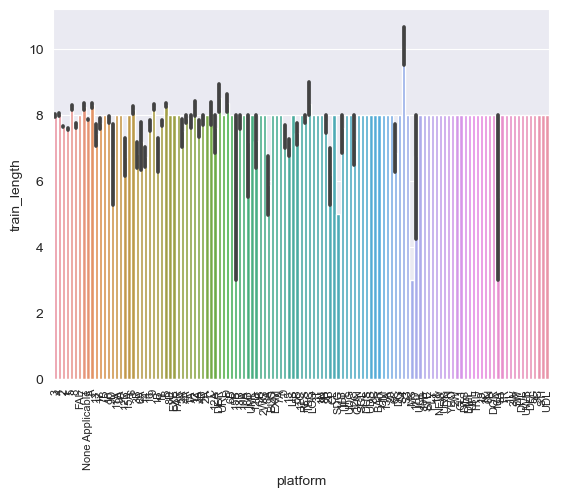

In [27]:
sns.barplot(y=nonulldf['train_length'],x=nonulldf['platform'],data=nonulldf)
plt.xticks(rotation=90,fontsize=8)
plt.show()

In [28]:
nonulldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121823 entries, 0 to 121822
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   message_time            121823 non-null  object        
 1   route_id                121823 non-null  object        
 2   unique_id               121823 non-null  object        
 3   service_start_date      121823 non-null  datetime64[ns]
 4   update_origin           117776 non-null  object        
 5   train_platform          121823 non-null  object        
 6   working_time_arrival    121823 non-null  object        
 7   working_time_departure  121823 non-null  object        
 8   planned_time_arrival    111060 non-null  object        
 9   planned_time_departure  110507 non-null  object        
 10  actual_arrival_time     100342 non-null  object        
 11  actual_departure_time   112009 non-null  object        
 12  platform                121823

In [29]:
nonulldf['train_length'].astype(int)
nonulldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121823 entries, 0 to 121822
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   message_time            121823 non-null  object        
 1   route_id                121823 non-null  object        
 2   unique_id               121823 non-null  object        
 3   service_start_date      121823 non-null  datetime64[ns]
 4   update_origin           117776 non-null  object        
 5   train_platform          121823 non-null  object        
 6   working_time_arrival    121823 non-null  object        
 7   working_time_departure  121823 non-null  object        
 8   planned_time_arrival    111060 non-null  object        
 9   planned_time_departure  110507 non-null  object        
 10  actual_arrival_time     100342 non-null  object        
 11  actual_departure_time   112009 non-null  object        
 12  platform                121823

In [30]:
nonulldf['train_length'].isnull().sum()

0

In [31]:
nonulldf['train_length'].apply(lambda x: x.is_integer()).sum()

121823

In [32]:
nonulldf['train_length'] = pd.to_numeric(nonulldf['train_length'], errors='coerce')

In [33]:
nonulldf['train_length']= nonulldf['train_length'].astype(int)
nonulldf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121823 entries, 0 to 121822
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   message_time            121823 non-null  object        
 1   route_id                121823 non-null  object        
 2   unique_id               121823 non-null  object        
 3   service_start_date      121823 non-null  datetime64[ns]
 4   update_origin           117776 non-null  object        
 5   train_platform          121823 non-null  object        
 6   working_time_arrival    121823 non-null  object        
 7   working_time_departure  121823 non-null  object        
 8   planned_time_arrival    111060 non-null  object        
 9   planned_time_departure  110507 non-null  object        
 10  actual_arrival_time     100342 non-null  object        
 11  actual_departure_time   112009 non-null  object        
 12  platform                121823

In [34]:
nonulldf['train_length'].value_counts()

train_length
8     96925
4      5242
12     5197
5      3835
10     3019
3      2957
6      2951
2      1353
7       214
9        91
11       39
Name: count, dtype: int64

In [35]:
testnadf=nonulldf.dropna()

In [36]:
testnadf.head()

,message_time,route_id,unique_id,service_start_date,update_origin,train_platform,working_time_arrival,working_time_departure,planned_time_arrival,planned_time_departure,actual_arrival_time,actual_departure_time,platform,train_length,is_delayed_arrival,is_delayed_departure
0,17:27:16.584408,202403297025211,F25211,2024-03-29,TD,ROMFORD,17:29:30,17:30:00,17:30:00,17:30:00,17:31:00,17:31:00,3,10,False,False
1,17:27:16.584408,202403297025211,F25211,2024-03-29,TD,SHENFLD,17:38:30,17:39:00,17:39:00,17:39:00,17:39:00,17:39:00,4,10,False,False
2,17:27:16.584408,202403297025211,F25211,2024-03-29,TD,BILERCY,17:44:30,17:49:30,17:45:00,17:49:00,17:45:00,17:49:00,2,10,False,False
3,17:27:16.599408,202403297420713,J20713,2024-03-29,CIS,CHLSFLD,17:27:30,17:28:00,17:28:00,17:28:00,17:29:00,17:30:00,2,8,False,False
6,17:27:23.859408,202403298155319,Q55319,2024-03-29,Trust,RICHMND,17:27:30,17:28:30,17:28:00,17:28:00,17:28:00,17:29:00,1,8,False,False


In [37]:
testnadf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86649 entries, 0 to 121822
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   message_time            86649 non-null  object        
 1   route_id                86649 non-null  object        
 2   unique_id               86649 non-null  object        
 3   service_start_date      86649 non-null  datetime64[ns]
 4   update_origin           86649 non-null  object        
 5   train_platform          86649 non-null  object        
 6   working_time_arrival    86649 non-null  object        
 7   working_time_departure  86649 non-null  object        
 8   planned_time_arrival    86649 non-null  object        
 9   planned_time_departure  86649 non-null  object        
 10  actual_arrival_time     86649 non-null  object        
 11  actual_departure_time   86649 non-null  object        
 12  platform                86649 non-null  object    

In [40]:
testnadf['working_time_arrival'].dtype

dtype('O')

In [39]:
testnadf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86649 entries, 0 to 121822
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   message_time            86649 non-null  object        
 1   route_id                86649 non-null  object        
 2   unique_id               86649 non-null  object        
 3   service_start_date      86649 non-null  datetime64[ns]
 4   update_origin           86649 non-null  object        
 5   train_platform          86649 non-null  object        
 6   working_time_arrival    86649 non-null  object        
 7   working_time_departure  86649 non-null  object        
 8   planned_time_arrival    86649 non-null  object        
 9   planned_time_departure  86649 non-null  object        
 10  actual_arrival_time     86649 non-null  object        
 11  actual_departure_time   86649 non-null  object        
 12  platform                86649 non-null  object    

In [258]:
testnadf.loc[:,'working_time_departure'] = pd.to_datetime(testnadf['working_time_departure'],format='%H:%M:%S').astype(str)

In [43]:
testnadf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86649 entries, 0 to 121822
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   message_time            86649 non-null  object        
 1   route_id                86649 non-null  object        
 2   unique_id               86649 non-null  object        
 3   service_start_date      86649 non-null  datetime64[ns]
 4   update_origin           86649 non-null  object        
 5   train_platform          86649 non-null  object        
 6   working_time_arrival    86649 non-null  object        
 7   working_time_departure  86649 non-null  object        
 8   planned_time_arrival    86649 non-null  object        
 9   planned_time_departure  86649 non-null  object        
 10  actual_arrival_time     86649 non-null  object        
 11  actual_departure_time   86649 non-null  object        
 12  platform                86649 non-null  object    

In [48]:
testnadf['working_time_arrival']

0         17:29:30
1         17:38:30
2         17:44:30
3         17:27:30
6         17:27:30
            ...   
121818    16:49:00
121819    17:12:00
121820    17:14:00
121821    17:16:30
121822    17:20:30
Name: working_time_arrival, Length: 86649, dtype: object

In [50]:
testnadf['working_time_arrival'].iloc[524]

datetime.time(17, 52)